In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# set style of graphs
plt.style.use('ggplot')

In [3]:
# import the dataset
raw_data = pd.read_csv('kc_house_data.csv')

In [4]:
# examine the dataset 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# looking at this, there are a number of missing values and some columns that will need to be translated
# into a number type

In [6]:
# look at price - - our dependent variable
raw_data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [7]:
# histogram of price to see distribution

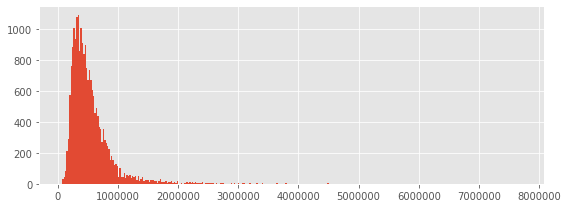

In [8]:
plt.figure(figsize=(8, 3))
raw_data['price'].hist(bins='auto')
plt.tight_layout()

In [9]:
# clear right skew

In [10]:
# 75% of values are less than $650K with the max price being significantly higher than the median of 
# $450K at $7.7M

In [11]:
raw_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
# remove id column as it won't help with regression
clean_data = raw_data.drop('id', axis=1)

In [13]:
clean_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [15]:
# handle missing values: waterfront, yr_renovated, view are columns with missing values

In [16]:
# Waterfront Missing Values
clean_data['waterfront'].nunique()

2

In [17]:
clean_data['waterfront'].unique()

array([nan,  0.,  1.])

In [18]:
# how many values are nan
clean_data['waterfront'].isna().sum()

2376

In [19]:
# given how many values this is, going to keep the data in for now
# set all nans to 0 as houses missing waterfront information likely do not have waterfronts
clean_data['waterfront'] = clean_data['waterfront'].fillna(value=0.)

In [20]:
# yr_renovated missing values
clean_data['yr_renovated'].nunique()

70

In [21]:
clean_data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [22]:
# how many are missing values?
clean_data['yr_renovated'].isna().sum()

3842

In [23]:
# similar to waterfront, going to assume that missing yr_renovated data is likely the result of a house 
# not having a renovation - - reassign all nans to 0.
clean_data['yr_renovated'] = clean_data['yr_renovated'].fillna(value=0.)

In [24]:
# View missing values
clean_data['view'].isna().sum()

63

In [25]:
clean_data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [26]:
# view relates to the number of times a house has been viewed -- similar to above assuming that
# missing values are related to houses that have not been viewed -- reassign all nans to 0.
clean_data['view'] = clean_data['view'].fillna(value=0.)

In [27]:
# check for any remaining missing values
clean_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
# no more missing values

In [29]:
# check for any duplicates
clean_data.duplicated().any()

False

In [30]:
# there are no duplicates

In [31]:
# Handle strings and convert all columns to appropriate types for regression
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [32]:
clean_data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [33]:
# replace '?' with zero as assumption is this relates to houses without a basement
clean_data['sqft_basement'] = clean_data['sqft_basement'].replace(to_replace = '?',
                                                                  value = '0.0')

In [34]:
# convert basement column to a number format
clean_data['sqft_basement'] = clean_data['sqft_basement'].astype('float64')

In [35]:
# handle date column - - convert to a datetime type and then split year, month, and day into separate columns

In [36]:
# check format of the date column
clean_data['date'].unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

In [37]:
# format is clearly MM-DD-YYYY

In [38]:
pd.to_datetime(clean_data['date'], infer_datetime_format=True)

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [39]:
clean_data['date'] = pd.to_datetime(clean_data['date'], infer_datetime_format=True)

In [40]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21597 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [41]:
# create individual columns
clean_data['year_sold'] = clean_data['date'].map(lambda x: x.year)
clean_data['month_sold'] = clean_data['date'].map(lambda x: x.month)
clean_data['day_sold'] = clean_data['date'].map(lambda x: x.day)

In [42]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21597 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [43]:
# drop date column
clean_data = clean_data.drop('date', axis=1)

In [44]:
# before further preprocessing / evaluating distributions, etc. run a baseline regression
# note that this will not necessary meet all assumptions for regression, just a baseline

In [45]:
y = clean_data['price']
X = clean_data.drop('price', axis=1)

In [46]:
# add constant
predictors = sm.add_constant(X)

NameError: name 'sm' is not defined

In [ ]:
# fit model
model = sm.OLS(y, predictors).fit()

In [ ]:
model.summary()

In [ ]:
# run in sklearn and run cross-val
regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, predictors, y, scoring='r2', cv=crossvalidation))
baseline

In [ ]:
# forward feature selection

In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

In [ ]:
# figure out feature selection

In [ ]:
#________________

In [ ]:
dkjaldkfa

In [ ]:
# evaluate columns, relationships between predictors and price, to refine model remove columns
# that violate assumptions, etc. 
# begin further preprocessing, OHE, etc. to try and improve results, ensure assumptions are met

In [ ]:
"""
Function to plot y vs. a chosen set of x variables
"""
def plot_x_y(n_rows=1, x_vals, y_val, data):
    fig, axes = plt.subplots(nrows=n_rows, ncols=len(x_vals), figsize=(20,5))
    for xcol, ax in zip(x_vals, axes):
        data.plot(kind='scatter', x=xcol, y=y_val, ax=ax, alpha=0.5)
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()

In [ ]:
clean_data.info()

In [ ]:
# plot all columns against price
plot_x_y(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], 'price', data=clean_data)
plot_x_y(['floors', 'waterfront', 'view', 'condition'], 'price', data=clean_data)
plot_x_y(['grade', 'sqft_above', 'sqft_basement', 'yr_built'], 'price', data=clean_data)
plot_x_y(['yr_renovated', 'zipcode', 'lat', 'long'], 'price', data=clean_data)
plot_x_y(['sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold'], 'price', data=clean_data)
plt.scatter(x=clean_data['day_sold'], y=clean_data['price'])

In [ ]:
# separate clear continous and categorical data
cont_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                  'lat', 'long', 'sqft_living15', 'sqft_lot15']
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
                 'yr_renovated', 'yr_built', 'zipcode', 'year_sold', 'month_sold', 'day_sold']

In [ ]:
# create dataframes
cont_variables = clean_data[cont_cols]
cat_variables = clean_data[cat_cols]

In [ ]:
# start preprocessing with the categorical data
# will need to separate out true categorical data and ordinal data - - ordinal data will be left as a single col,
# non-ordinal data will be one hot encoded

In [ ]:
# replot against price to see relationships, distributions, etc.
plot_x_y(['bedrooms', 'bathrooms', 'floors', 'waterfront'], 'price', data=clean_data)
plot_x_y(['view', 'condition', 'grade', 'yr_renovated'], 'price', data=clean_data)
plot_x_y(['yr_built', 'zipcode'], 'price', data=clean_data)
plot_x_y(['year_sold', 'month_sold', 'day_sold'], 'price', data=clean_data)

In [ ]:
clean_data['year_sold'].unique()

In [ ]:
# the data only includes houses sold in 2014 and 2015

In [ ]:
cat_variables.info()

In [ ]:
# plot boxplots to see if there is an ordinal relationship
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='bedrooms', y='price', data=clean_data)
plt.show()

In [ ]:
# there are a lot of outliers on price
# look at distribution of price again
sns.distplot(clean_data['price'])

In [ ]:
# look at the log of price
sns.distplot(np.log(clean_data['price']))

In [ ]:
# log transform price
clean_data['log_price'] = np.log(clean_data['price'])

In [ ]:
""""""
# drop original price column
preprocessed = clean_data.drop('price', axis=1)

In [ ]:
# rerun model to see if this helps improve results
y = preprocessed['log_price']
X = preprocessed.drop('log_price', axis=1)

predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()

In [ ]:
model.summary()

In [ ]:
# cross-fold validation
regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)
model_2 = np.mean(cross_val_score(regression, predictors, y, scoring='r2', cv=crossvalidation))
model_2

In [ ]:
model_2 - baseline

In [ ]:
# results improved significantly

In [ ]:
# Bedrooms
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='bedrooms', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# there seems to be an ordinal relationship here, that is slightly linear - - keep as a single column

In [ ]:
# Bathrooms
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='bathrooms', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# there is an ordinal relationship here as well that appears more or less linear - - keep as a single column

In [ ]:
# Floors
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='floors', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# Not as ordinal of a relationship - - OHE
floor_dummies = pd.get_dummies(preprocessed['floors'], prefix='floors', drop_first=True)

In [ ]:
# Waterfront
plt.figure(figsize=(5,3))
ax = sns.boxplot(x='waterfront', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# only two possible values so will OHE
waterfront_dummies = pd.get_dummies(preprocessed['waterfront'], prefix='waterfront', drop_first=True)

In [ ]:
# View
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='view', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# seems like there is an ordinal relationship here - - will leave as a single column for now

In [ ]:
# Condition
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='condition', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# no clear ordinal relationship - - OHE
condition_dummies = pd.get_dummies(preprocessed['condition'], prefix='condition', drop_first=True)

In [ ]:
# Grade
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='grade', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# clear ordinal relationship, leave as a single column

In [ ]:
# Year Renovated
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='yr_renovated', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# would not say there is a clear relationship here - try OHE
yr_reno_dummies = pd.get_dummies(preprocessed['yr_renovated'], prefix='yr_reno', drop_first=True)

In [ ]:
# Year Built
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='yr_built', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# no clear relationship - - OHE
yr_built_dummies = pd.get_dummies(preprocessed['yr_built'], prefix='yr_built', drop_first=True)

In [ ]:
# Zipcode
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='zipcode', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# no clear relationship, OHE
zipcode_dummies = pd.get_dummies(preprocessed['zipcode'], prefix='zipcode', drop_first=True)

In [ ]:
# Year Sold
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='year_sold', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# OHE
year_sold_dummies = pd.get_dummies(preprocessed['year_sold'], prefix='yr_sold', drop_first=True)

In [ ]:
# Month Sold
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='month_sold', y='log_price', data=preprocessed)
plt.show()

In [ ]:
# again no clear relationship, OHE
month_sold_dummies = pd.get_dummies(preprocessed['month_sold'], prefix='month_sold', drop_first=True)

In [ ]:
# Day Sold
day_sold_dummies = pd.get_dummies(preprocessed['day_sold'], prefix='day_sold', drop_first=True)

In [ ]:
# now that we have created some dummy variables - concat and rerun to see if any improvement
dummy_list = [floor_dummies, waterfront_dummies, condition_dummies, 
              yr_reno_dummies, yr_built_dummies, zipcode_dummies, 
              year_sold_dummies, month_sold_dummies, day_sold_dummies]

In [ ]:
preprocessed = pd.concat([preprocessed, floor_dummies, waterfront_dummies, condition_dummies,
                          yr_reno_dummies, yr_built_dummies, zipcode_dummies, year_sold_dummies,
                          month_sold_dummies, day_sold_dummies], axis=1)

In [ ]:
# drop columns
preprocessed = preprocessed.drop(['floors', 'waterfront', 'condition', 'yr_renovated', 
                                  'yr_built', 'zipcode', 'year_sold', 'month_sold', 'day_sold'], axis=1)

In [ ]:
# rerun the model to see if results improve at all

In [ ]:
y = preprocessed['log_price']
X = preprocessed.drop('log_price', axis=1)

In [ ]:
predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()

In [ ]:
model.summary()

In [ ]:
# r2 value is up now, again assumptions have not been checked yet

In [ ]:
# cross validation
regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)
model_3 = np.mean(cross_val_score(regression, predictors, y, scoring='r2', cv=crossvalidation))
model_3

In [ ]:
model_3 - model_2

In [ ]:
# now that we have handled categorical data, remove multicollinearity
data_pred = preprocessed.iloc[:, 2:]
data_pred.head()

In [ ]:
# return only highly correlated pairs
# save absolute value of correlation matrix as data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#zip the variable name columns (named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

#set index to pairs
df.set_index(['pairs'], inplace=True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace=True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# get pairs that are more than 75% correlated
df[(df.cc>.75) & (df.cc<1)]

In [ ]:
#sqft_above, sqft_living, grade are correlated with each other, same with sqft_living and sqft_living15
# remove condition_4 as it is correlated with condition_3
# remove sqft_living and sqft_above
preprocessed = preprocessed.drop(['condition_4', 'sqft_living', 'sqft_above'], axis=1)

In [ ]:
# rerun regressions to see how this changed things
y = preprocessed['log_price']
X = preprocessed.drop('log_price', axis=1)

predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()
model.summary()

In [ ]:
# cross validation
regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)
model_4 = np.mean(cross_val_score(regression, predictors, y, scoring='r2', cv=crossvalidation))
model_4

In [ ]:
model_4 - model_3

In [ ]:
# there is a slight decrease in performance here, but we will keep it so we don't include effects of multicollinearity

In [ ]:
# continue preprocessing other continuos data

In [ ]:
# replot against price to evaluate relationships

In [ ]:
plot_x_y(['sqft_lot', 'sqft_basement', 'lat'], 'log_price', data=preprocessed)
plot_x_y(['long', 'sqft_living15', 'sqft_lot15'], 'log_price', data=preprocessed)

In [ ]:
# sqft_living, sqft_above, sqft_basement, sqft_living15 all appear to meet the linear assumptions
# clear non-linear columns:
non_linear = ['sqft_lot', 'long', 'sqft_lot15']
linear = ['sqft_living15', 'lat', 'sqft_basement']

In [ ]:
preprocessed = preprocessed.drop(['sqft_lot', 'long', 'sqft_lot15'], axis=1)

In [ ]:
# rerun regression
y = preprocessed['log_price']
X = preprocessed.drop('log_price', axis=1)

predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()
model.summary()

In [ ]:
# cross validation
regression = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
model_5 = np.mean(cross_val_score(regression, predictors, y, scoring='r2', cv=crossvalidation))
model_5

In [ ]:
# replot cont variables against price

In [ ]:
plot_x_y(['sqft_basement', 'sqft_living15', 'lat'], 'log_price', data=preprocessed)

In [ ]:
# relationships appear relatively linear, will keep these variables in - - lat is not so linear, but may be polynomial
# will evaluate later on

In [ ]:
model_5 - model_4

In [ ]:
# slightly worse, but variables did not meet assumptions so removed them

In [ ]:
# check which of the continous variables would benefit from log transformation
sns.distplot(preprocessed['sqft_basement'])
plt.show()
sns.distplot(preprocessed['sqft_living15'])
plt.show()
sns.distplot(preprocessed['lat'])
plt.show()

In [ ]:
# log transform sqft_living15 as this looks like it could benefit (right skew)
preprocessed['sqft_living15'] = np.log(preprocessed['sqft_living15'])

In [ ]:
# rerun to see if this impacted things for the better
# rerun regression
y = preprocessed['log_price']
X = preprocessed.drop('log_price', axis=1)

predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()
model.summary()

In [ ]:
# cross validation
regression = LinearRegression()
crossvalidation = KFold(n_splits=4, shuffle=True, random_state=1)
model_6 = np.mean(cross_val_score(regression, predictors, y, scoring='r2', cv=crossvalidation))
model_6

In [ ]:
model_6 - model_5

In [ ]:
# log transformations worked

In [ ]:
cross_val_score()